# Preface

Here, we are trying to define a model which can recognize handwritten MNIST digits.
<br/> Model has a vanilla architecture. We will be using

*   Position Maxpooling
*   Position 1x1 Kernel
*   Position Relu activation

We will be designing vanilla architecture with enough layers to have receptive field  24 which will cover almost whole image. Object in mage will be covered full as there is ~2pixel margin.

# **Import Libraries and modules**

In [0]:
# Installing Keras Library and importing the same.
# Reference: https://keras.io/
!pip install -q keras
import keras

In [0]:
# Numpy is library used for efficient high level mathemtical processing on multi dimensional arrays
import numpy as np

# Keras provides a Sequential model API. This is way of creating a linear stack of layers while creating models.
from keras.models import Sequential

# Flatten provided by Keras will be used to convert a multidimensional tensor into a single 1-D tensor
from keras.layers import Flatten
from keras.layers import Dense, Dropout, Activation, Flatten, Add

# Convolution2D will be used to create a convolution kernel that is convolved with the layer input to produce a tensor of outputs
from keras.layers import Convolution2D, MaxPooling2D

# Import np_utils from keras
from keras.utils import np_utils

# Being a subset of NIST, MNIST has datasets of handwritten digits with 60,000 training set and 10,000 test set
from keras.datasets import mnist

# Load pre-shuffled MNIST data into train and test sets

In [0]:
# Loads MINST dataset, 60,000 training set and 10,000 test set
# X values will have images,  y values will have digit represented by the corresponding X images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


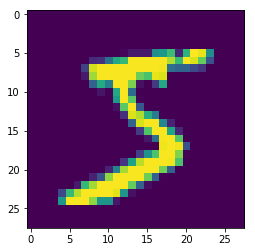

In [0]:
# Let's see a random image in a training dataset (X_train)

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# As you see above dimensions, loaded training dataset has a dimension of 2d. So, we have 60,000 2d images 28x28
# Let's reshapte to 3D as our model requires 3d images. Here, we are reshaping 28x28 to 28x28x1 where 1 being the channel of the image
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Using a 32 bit precision is a common approach in neural network training.
# Reason behind is that to make sure that the dataset fits easily in RAM.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 255 is the max pixel value in an image. Dividing all pixel values by 255 ensures that the input features are scaled between 0.0 and 1.0
# Reason behind to scale between 0.0 and 1.0 is to make sure default learning rate works well.
X_train /= 255
X_test /= 255

In [0]:
# Let's see corresponding y_train value
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# Reason behind this conversion is, at the end of the model we will be having 10 nodes which will tell, out of 0-9 digits which does the input image represent.
# Hence to learn as well as to evaluate, we need a 10 length array for each output label
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
# Let's see what are the initial 10 values in y_train. Values is y_train corresponds to the digit represnted by x dataset images.
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Model Architecture

In [0]:
# Importing activation as well as maxpooling which will be used in this model
from keras.layers import Activation

# Initializing Sequential API as we will be creating model in a linear stack way
model = Sequential()



# Input Dimension  = 28x28x1
# Kernel           = 3x3x1
# No:of Kernels    = 16
# Output Dimension = 26x26x16 (Here,16 is the number of channels)
# Receptive Field  = 3x3  
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))

# Input Dimension  = 26x26x16
# Kernel           = 3x3x16
# No:of Kernels    = 32
# Output Dimension = 24x24x32 (Here,32 is the number of channels)
# Receptive Field  = 5x5 
model.add(Convolution2D(32, 3, 3, activation='relu'))

# Input Dimension  = 24x24x16
# Kernel           = 3x3x16
# No:of Kernels    = 64
# Output Dimension = 22x22x64 (Here,64 is the number of channels)
# Receptive Field  = 7x7 
model.add(Convolution2D(64, 3, 3, activation='relu'))



# Input Dimension  = 22x22x64
# Kernel           = 1x1x64
# No:of Kernels    = 16
# Output Dimension = 22x22x16 (Here,16 is the number of channels)
# Receptive Field  = 7x7
# NOTE: 1x1 Kernels are used here for combining the discovered edges and gradients
# No effect on output resolution or receptive field
model.add(Convolution2D(16, 1, activation='relu'))

# Input Dimension  = 22x22x64
# Maxpooling Dimension = 2x2 (Default is 2x2)
# Output Dimension = 11x11x64 (Here,64 is the number of channels)
# Receptive Field  = 14x14 
# NOTE: Maxpooling halves the resolution and doubles the receptive field
model.add(MaxPooling2D())



# Input Dimension  = 11x11x64
# Kernel           = 3x3x64
# No:of Kernels    = 16
# Output Dimension = 9x9x16 (Here,16 is the number of channels)
# Receptive Field  = 16x16 
model.add(Convolution2D(16, 3, 3, activation='relu'))

# Input Dimension  = 9x9x16
# Kernel           = 3x3x16
# No:of Kernels    = 32
# Output Dimension = 7x7x32 (Here,32 is the number of channels)
# Receptive Field  = 18x18 
model.add(Convolution2D(32, 3, 3, activation='relu'))



# Input Dimension  = 7x7x32
# Kernel           = 1x1x32
# No:of Kernels    = 16
# Output Dimension = 7x7x16 (Here,16 is the number of channels)
# Receptive Field  = 18x18
# NOTE: 1x1 Kernels are used here for dimension(channel) reduction.
# No effect on output resolution or receptive field
model.add(Convolution2D(16, 1, activation='relu'))

# Input Dimension  = 7x7x16
# Kernel           = 3x3x16
# No:of Kernels    = 16
# Output Dimension = 5x5x16 (Here,16 is the number of channels)
# Receptive Field  = 20x20
model.add(Convolution2D(16, 3, 3, activation='relu'))

# Input Dimension  = 5x5x16
# Kernel           = 3x3x16
# No:of Kernels    = 32
# Output Dimension = 3x3x32 (Here,32 is the number of channels)
# Receptive Field  = 22x22
model.add(Convolution2D(32, 3, 3, activation='relu'))

# Input Dimension  = 3x3x32
# Kernel           = 3x3x32
# No:of Kernels    = 64
# Output Dimension = 1x1x64 (Here,64 is the number of channels)
# Receptive Field  = 24x24
model.add(Convolution2D(64, 3, 3, activation='relu'))



# Input Dimension  = 1x1x64
# Kernel           = 1x1x64
# No:of Kernels    = 10
# Output Dimension = 1x1x10 (Here,32 is the number of channels)
# Receptive Field  = 24x24 
# NOTE: 1x1 Kernels are used here for dimension(channel) reduction.
# No effect on output resolution or receptive field
model.add(Convolution2D(10, 1))

# Input Dimension  = 1x1x10
# Output Dimension = 10
model.add(Flatten())

# We use a “softmax” activation function in the output layer. 
# This is to ensure the output values are in the range of 0 and 1 and used as predicted probabilities.
model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16,

In [0]:
# Let's see the overview of stacked up layers in the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 22, 22, 16)        1040      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 9, 9, 16)          2320      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 32)          4640      
__________

# Model Training & Prediction

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

**Train for 20 Epochs**

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 16s 264us/step - loss: 0.2228 - acc: 0.9308
Epoch 2/20
60000/60000 [==============================] - 15s 245us/step - loss: 0.0742 - acc: 0.9771
Epoch 3/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.0560 - acc: 0.9832
Epoch 4/20
60000/60000 [==============================] - 14s 232us/step - loss: 0.0457 - acc: 0.9859
Epoch 5/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.0396 - acc: 0.9885
Epoch 6/20
60000/60000 [==============================] - 16s 267us/step - loss: 0.0338 - acc: 0.9899
Epoch 7/20
60000/60000 [==============================] - 14s 242us/step - loss: 0.0313 - acc: 0.9905
Epoch 8/20
60000/60000 [==============================] - 14s 232us/step - loss: 0.0282 - acc: 0.9912
Epoch 9/20
60000/60000 [==============================] - 14s 234us/step - loss: 0.0266 - acc: 0.9917
Epoch 10/20
60000/60000 [==============================] - 14s 234us/step - loss: 

**Evaluate the model**

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.037133911192653524, 0.9915]


# Inference
Above training & evaluation statistics says training accuracy has reached 99.5. But, testing accuracy is 99.1 . 
- This means there is a slight overfitting. 
- Also, scope of regularization is present in this architecture w.r.t no: of parameters and layers. 
- As part of execution, we have to include validation accuracy as well on each epoch, so that we will know how our model is performing, rather than evaluating at the end.

We will focus in upcoming iterations to fix these improvements step by step

# Visualization of Features extracting by Kernel

We can see that filters for 'conv2d_278' layer before Maxpooling are looking for edges & gradients which is really a good sign !

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

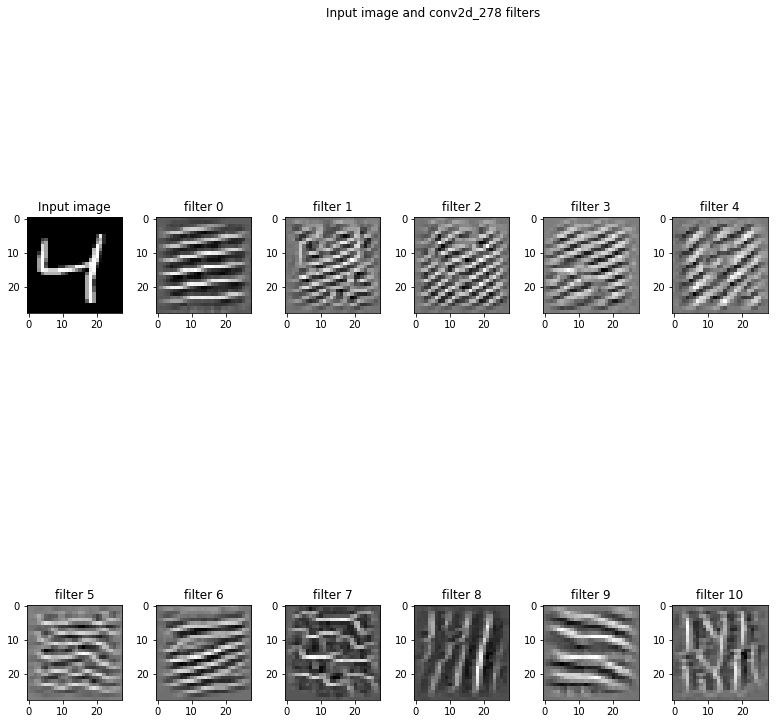

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_278'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()